In [1]:
import epigraph_elijahsandler as ees
from google.oauth2 import service_account
from google.cloud import bigquery

In [2]:
pip show epigraph_elijahsandler

Name: epigraph-elijahsandler
Version: 0.1.1
Summary: A package for visualizing GLEAM and LEAM-US data.
Home-page: 
Author: 
Author-email: Elijah Sandler <sandler.e@northeastern.edu>
License: 
Location: C:\Users\elija\Documents\24f-coop\demovenv\Lib\site-packages
Requires: db-dtypes, google-cloud-bigquery, kaleido, matplotlib, pandas, plotly
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
dir(ees)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'area_plot',
 'helper',
 'importation_plots',
 'relative_risk',
 'sankey',
 'templates']

In [4]:
ees.area_plot

<function epigraph_elijahsandler.importation_plots.area_plot(client, table_name: str, reference_table_name: str, source_geo_level: str, target_geo_level: str, output_resolution: str = None, source_values=None, target_values=None, domestic: bool = True, cutoff: float = 0.05, value: str = 'importations', title: str = 'Area Plot', xlabel: str = 'Date', ylabel: str = 'Exportations', legendlabel: str = 'Source', display: str = 'source') -> plotly.graph_objs._figure.Figure>

In [5]:
ees.sankey

<function epigraph_elijahsandler.importation_plots.sankey(client, table_name, reference_table_name, source_geo_level, target_geo_level, source_values, target_values, date_range, cutoff=0.05, source_resolution=None, target_resolution=None, domestic=True, title='Sankey Diagram')>

In [6]:
ees.relative_risk

<function epigraph_elijahsandler.importation_plots.relative_risk(client, table_name, reference_table_name, source_geo_level, target_geo_level, source_values, target_values, date_range, cutoff=0.05, n=20, target_resolution=None, domestic=True, title='Relative Risk of Importation', xlabel='Relative Risk of Importation', ylabel=None)>

In [26]:
credentials = service_account.Credentials.from_service_account_file('C:\\Users\\elija\\Documents\\24f-coop\\credentials.json')
project = 'net-data-viz-handbook'
# Initialize a GC client
client = bigquery.Client(credentials=credentials, project=project)

In [27]:
table_name = 'net-data-viz-handbook.importation_data.sir_importations_1'
reference_table_name = 'reference.gleam-geo-map'
source_geo_level = 'continent_label'  # Geographic level for source filtering
target_geo_level = 'continent_label'        # Geographic level for target filtering
output_resolution = 'region_label'      # Geographic level for output

source_values = ['Asia']
target_values = ['North America']      
domestic = False
cutoff = 0.00

In [37]:
fig = ees.area_plot(client=client, table_name=table_name, reference_table_name=reference_table_name,
                               source_geo_level=source_geo_level, target_geo_level=target_geo_level, output_resolution=output_resolution,
                               source_values=source_values, target_values=target_values, domestic=domestic, cutoff=cutoff, 
                               title="Example Area Plot", value='rolling_importations', display='source')

C:\Users\elija\Documents\24f-coop\demovenv\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning:

BigQuery Storage module not found, fetch data with the REST endpoint instead.



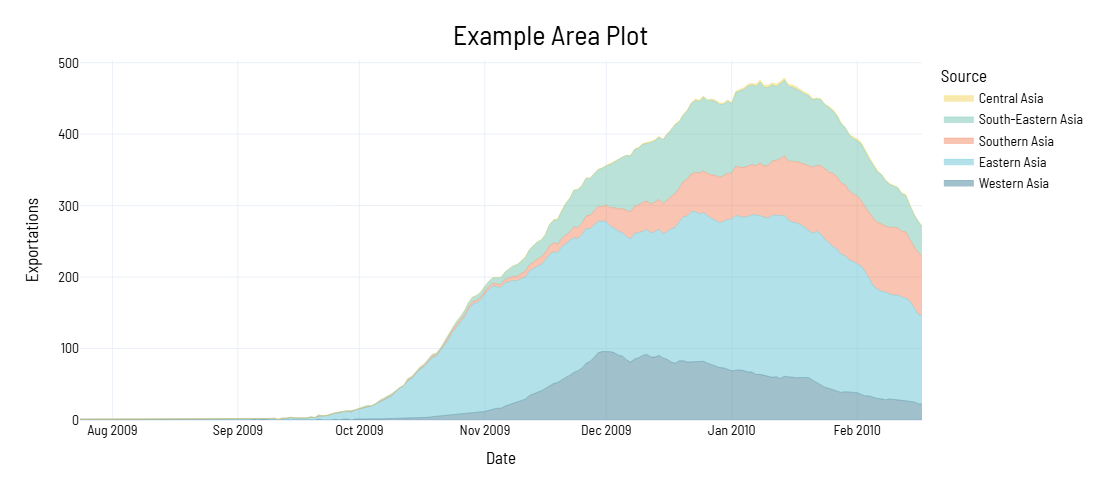

In [38]:
fig.update_layout(width=1000, height=500)
fig.show()

In [39]:
fig.data

(Scatter({
     'fillpattern': {'shape': ''},
     'hovertemplate': 'source=Western Asia<br>date=%{x}<br>rolling_importations=%{y}<extra></extra>',
     'legendgroup': 'Western Asia',
     'line': {'color': '#428299', 'width': 0.4},
     'marker': {'symbol': 'circle'},
     'mode': 'lines',
     'name': 'Western Asia',
     'orientation': 'v',
     'showlegend': True,
     'stackgroup': '1',
     'x': array([datetime.date(2009, 7, 24), datetime.date(2009, 9, 5),
                 datetime.date(2009, 9, 7), datetime.date(2009, 9, 14),
                 datetime.date(2009, 9, 19), datetime.date(2009, 9, 21),
                 datetime.date(2009, 9, 25), datetime.date(2009, 9, 27),
                 datetime.date(2009, 9, 28), datetime.date(2009, 9, 30),
                 datetime.date(2009, 10, 1), datetime.date(2009, 10, 2),
                 datetime.date(2009, 10, 3), datetime.date(2009, 10, 4),
                 datetime.date(2009, 10, 5), datetime.date(2009, 10, 6),
                 dateti

In [11]:
table_name = "net-data-viz-handbook.importation_data.sir_importations_1"
reference_table_name = 'reference.gleam-geo-map'

source_geo_level = "continent_label"  # This could also be "region_id" or other levels
source_values = ['Europe']  
source_resolution = "country_name"

target_geo_level = "continent_label"  # Could be "country_id", "region_label", etc.
target_values = ["North America", "South America"]  # Regions to filter on
target_resolution = 'country_name'

date_range = ["2009-10-01", "2009-10-31"]  # The date range for the data
cutoff = 0.1  # Threshold for categorizing regions
domestic = False

In [12]:
sfig = ees.sankey(client, table_name, reference_table_name, 
                                                source_geo_level, target_geo_level, 
                                                source_values, target_values, 
                                                source_resolution=source_resolution, target_resolution=target_resolution,
                                                date_range=date_range, cutoff=cutoff, domestic=domestic, title='Sankey!')
sfig

C:\Users\elija\Documents\24f-coop\demovenv\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning:

BigQuery Storage module not found, fetch data with the REST endpoint instead.



In [13]:
sfig.layout['title']['y'] = .85
sfig.update_layout(width=800, height=400)
sfig

C:\Users\elija\Documents\24f-coop\demovenv\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning:

BigQuery Storage module not found, fetch data with the REST endpoint instead.



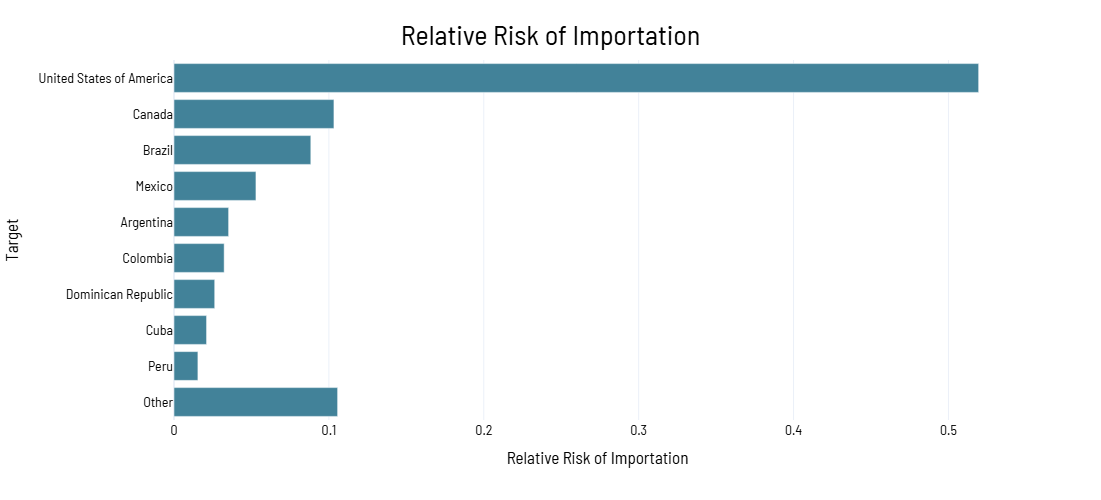

In [23]:
fig = ees.relative_risk(client, table_name, reference_table_name, source_geo_level, 
                                target_geo_level, source_values, target_values, 
                                date_range=date_range, cutoff=0.00, n=10, 
                                target_resolution=target_resolution, domestic=True, 
                                title='Relative Risk of Importation', xlabel='Relative Risk of Importation')
fig.update_layout(width=800, height=500)
fig

In [15]:
# pip install --upgrade -i https://test.pypi.org/simple/ epigraph-elijahsandler;

In [16]:
# pip install db-dtypes google-cloud-bigquery kaleido plotly matplotlib pandas